In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Main Task

In [2]:
#reading data points
pts = np.zeros((1,2))
i=0
with open(r'Data.txt') as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t

        if(i==0):
            pts[0]=point
        else:
            pts=np.append(pts,np.array([point]),axis=0)  
        i+=1             
data=pts.astype(float)

data[0]

array([19.626, 21.089])

In [3]:
#Distance between two points using the euclidean distance rule
def euclid_distance(p1,p2):
    return math.sqrt(((p2[0]-p1[0])**2)+((p2[1]-p1[1])**2))

#The farthest point from the parameter center
def max_distance(center,points):
    Max=0
    max_index=0
    for i in range(len(points)):
        if(euclid_distance(center,points[i])>=Max):
            Max=euclid_distance(center,points[i])
            max_index=i
    return max_index

#Initializing random cluster centers for 100 times
def intialize_miu(data):
    allIndices=np.array([[0,0,0]])
    first_random=np.random.choice(len(data), size=100, replace=False)
    for i in range(100):
        center=np.array([0,0,0])
        center[0]=first_random[i]
        center[1]=max_distance(data[center[0]],data)
        center[2]=max_distance(data[center[1]],data)
        
        if(i==0):
            allIndices[0]=center
        else:
            allIndices=np.append(allIndices,[center],axis=0)
    return allIndices

initial_miu=intialize_miu(data)

print(len(initial_miu))
initial_miu[0]

100


array([266,  89, 232])

In [4]:
#Computes rnk for point x
def rnk(x,miu):
    Min=euclid_distance(x,miu[0])
    if(euclid_distance(x,miu[1])<Min):
        return 1
    elif(euclid_distance(x,miu[2])<Min):
        return 2
    else:
        return 0

#assigning each point for a cluster 
def assign_clusters(miu,points):
    #After getting rnk for each point:
        #indices0 : indices belonging to cluster 0
        #indices1 : indices belonging to cluster 1
        #indices2 : indices belonging to cluster 2

    result=np.zeros(len(points))
    indices0=np.array([])
    indices1=np.array([])
    indices2=np.array([])
    
    
    #get rnk for each point
    for i in range(len(points)):
        result[i]=rnk(points[i],miu)
        
        if(result[i]==0):
            indices0=np.append(indices0,[i])
        elif(result[i]==1):
            indices1=np.append(indices1,[i])
        else:
            indices2=np.append(indices2,[i])
    
    Len=np.array([len(indices0),len(indices1),len(indices2)])
    #check if each cluster has the same size, 
    #if no, the arrays of indices of smaller clusters is filled with -1 until it matches the size of the biggest cluster
    
    if(Len.all()!=Len[0]):
        max_len=len(indices0)
        if(len(indices1)>max_len):
            max_len=len(indices1)
        elif(len(indices2)>max_len):
            max_len=len(indices2)
    
        for j in range(3):
            if (j==0):
                temp=indices0
            elif(j==1):
                temp=indices1
            else:
                temp=indices2
            while(max_len>len(temp)):
                temp=np.append(temp,[-1])
        
            if (j==0):
                indices0=temp
            elif(j==1):
                indices1=temp
            else:
                indices2=temp
            
    indices=np.array([indices0,indices1,indices2])
    return indices


#updates the centers of clusters
    #old_miu: initial centers of clusters
    #points: data points
    #k: no. of clusters
def update_miu(old_miu,points,k):
    new_miu=np.array([points[old_miu[0]],points[old_miu[1]],points[old_miu[2]]])
    for t in range(1000):
        #assign points for its cluster using the updated centers
        clusters=assign_clusters(new_miu,points)
        convergence=False
        for i in range(k):
            #find the new center of cluster k by calculating the average of points of this cluster
            sum_x=0
            sum_y=0
            if(len(np.where(clusters[i]==-1)[0])==0):
                n=len(clusters[i])
            else:
                n=np.where(clusters[i]==-1)[0][0]
            if(n==0):
                continue
            for j in range(n):
                sum_x+=points[int(clusters[i][j])][0]
                sum_y+=points[int(clusters[i][j])][0]
                
            avg=np.array([sum_x/n,sum_y/n])
            
            #convergence is not reached until all k means are not updated anymore
            if(np.array_equal(avg, new_miu[i])):
                convergence=True
            else:
                convergence=False
                
            new_miu[i]=avg
            
            #when convergence is reached stop updating the centers and return the last claculated ones
            if(convergence):
                return new_miu     
    return new_miu

#returns the average distance between the points and provided centers
def average_distances(points,this_cluster,this_miu,k):
    sum_distances=0
    for j in range(k):
        for t in range(len(this_cluster[j])):
            #add the distance between each point and the mean of its cluster to the sum
            sum_distances+=euclid_distance(points[int(this_cluster[j][t])],this_miu[j])
            
    #caclcuate the average of distances
    avg_distances=sum_distances/len(points)
    return avg_distances

#returns the centers that have the least average distance with the data points
def best_miu(initial_miu,points,k):
    best_mean=update_miu(initial_miu[0],points,k)
    best_cluster=assign_clusters(best_mean,points)
    best_average=average_distances(points,best_cluster,best_mean,k)
    
    for i in range(1,100):
        this_mean=update_miu(initial_miu[i],points,k)
        this_cluster=assign_clusters(this_mean,points)
        this_avg=average_distances(points,this_cluster,this_mean,k)
        
        if(best_average>this_avg):
            best_average=this_avg
            best_mean=this_mean
            
    return best_mean

#returns the best clustering result using the best centers
def best_clusters(best_miu,points):
    return assign_clusters(best_miu,points)
    
miu = best_miu(initial_miu,data,3)
clusters_Indices_1 = best_clusters(miu,data).astype(int)

clusters_Indices_1

array([[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  7

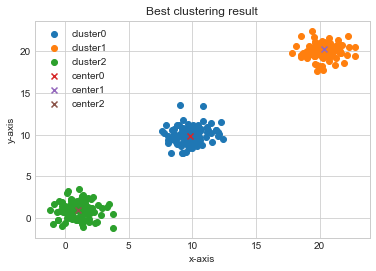

In [5]:
#plotting the best clustering result
    
    #splitting x-axis from y-axis
        #ex:cluster0[0] :x-coordinates of cluster 0 , cluster0[1] :y-coordinates of cluster 0
cluster0=np.hsplit(data[clusters_Indices_1[0][0]:clusters_Indices_1[0][len(clusters_Indices_1[0])-1]+1], 2)
cluster1=np.hsplit(data[clusters_Indices_1[1][0]:clusters_Indices_1[1][len(clusters_Indices_1[1])-1]+1], 2)
cluster2=np.hsplit(data[clusters_Indices_1[2][0]:clusters_Indices_1[2][len(clusters_Indices_1[2])-1]+1], 2)

plt.scatter(cluster0[0],cluster0[1],marker='o',label="cluster0");
plt.scatter(cluster1[0],cluster1[1],marker='o',label="cluster1");
plt.scatter(cluster2[0],cluster2[1],marker='o',label="cluster2");

plt.scatter(miu[0][0],miu[0][1],marker='x',label="center0")
plt.scatter(miu[1][0],miu[1][1],marker='x',label="center1")
plt.scatter(miu[2][0],miu[2][1],marker='x',label="center2")

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Best clustering result")
plt.legend()
plt.savefig('Main Task Plotting.jpg')

# Bonus Task

In [6]:
#reading data points
pts = np.zeros((1,2))
i=0
with open(r'Data2.txt') as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t

        if(i==0):
            pts[0]=point
        else:
            pts=np.append(pts,np.array([point]),axis=0)  
        i+=1             
data2=pts.astype(float)

data2[0]

array([0.83512, 1.6277 ])

In [7]:
clusters_Indices_2=best_clusters(miu,data2).astype(int)

clusters_Indices_2

array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

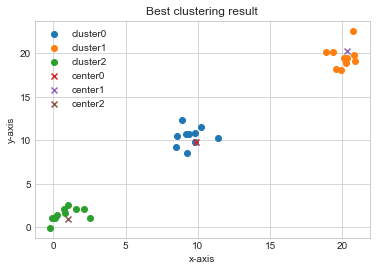

In [8]:
#plotting the points of data2 after assigning them to the clusters
    
    #splitting x-axis from y-axis
        #ex:cluster0[0] :x-coordinates of cluster 0 , cluster0[1] :y-coordinates of cluster 0
cluster0=np.hsplit(data2[clusters_Indices_2[0][0]:clusters_Indices_2[0][len(clusters_Indices_2[0])-1]+1], 2)
cluster1=np.hsplit(data2[clusters_Indices_2[1][0]:clusters_Indices_2[1][len(clusters_Indices_2[1])-1]+1], 2)
cluster2=np.hsplit(data2[clusters_Indices_2[2][0]:clusters_Indices_2[2][len(clusters_Indices_2[2])-1]+1], 2)

plt.scatter(cluster0[0],cluster0[1],marker='o',label="cluster0");
plt.scatter(cluster1[0],cluster1[1],marker='o',label="cluster1");
plt.scatter(cluster2[0],cluster2[1],marker='o',label="cluster2");

plt.scatter(miu[0][0],miu[0][1],marker='x',label="center0")
plt.scatter(miu[1][0],miu[1][1],marker='x',label="center1")
plt.scatter(miu[2][0],miu[2][1],marker='x',label="center2")

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Best clustering result")
plt.legend()
plt.savefig('Bonus Task Plotting.jpg')